<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/ul/04_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Wizualizacja - dendrogram](#3)
5. [Grupowanie hierarchiczne](#4)
6. [OneHotEncoder](#5)
7. [Pandas *get_dummies()*](#6)
8. [Standaryzacja - StandardScaler](#7)
9. [Przygotowanie danych do modelu](#8)



### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_blobs
sns.set(font_scale=1.2)
sklearn.__version__

'0.22.1'

### <a name='1'></a> Wygenerowanie danych

In [2]:
data, _ = make_blobs(n_samples=10, centers=2, cluster_std=1.0, center_box=(-8.0, 8.0), random_state=42)
df = pd.DataFrame(data, columns=['x1', 'x2'])
df

,x1,x2
0,1.986985,1.016248
1,-2.470776,6.745699
2,-0.428145,7.978864
3,2.699072,1.892783
4,-2.241511,6.977292
5,2.803879,0.166232
6,3.779431,0.153788
7,-1.765396,5.298149
8,-2.476832,7.753989
9,5.177552,1.352759


### <a name='2'></a> Wizualizacja danych

In [3]:
fig = px.scatter(df, 'x1', 'x2', width=700, height=500, title='Klasteryzacja')
fig.update_traces(marker_size=12)
fig.show()

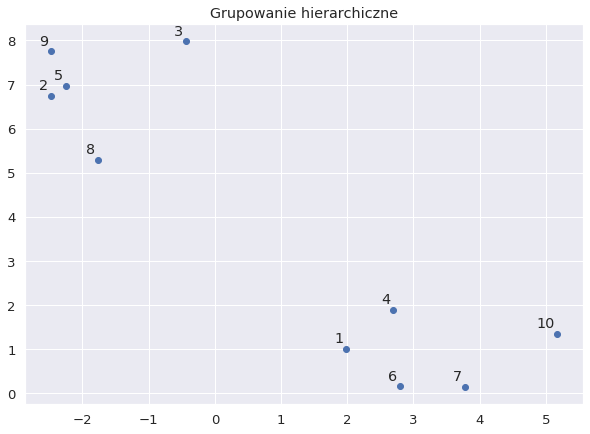

In [4]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1])

for label, x, y in zip(range(1, 11), data[:, 0], data[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.title('Grupowanie hierarchiczne')
plt.show()

### <a name='3'></a> Wizualizacja - dendrogram

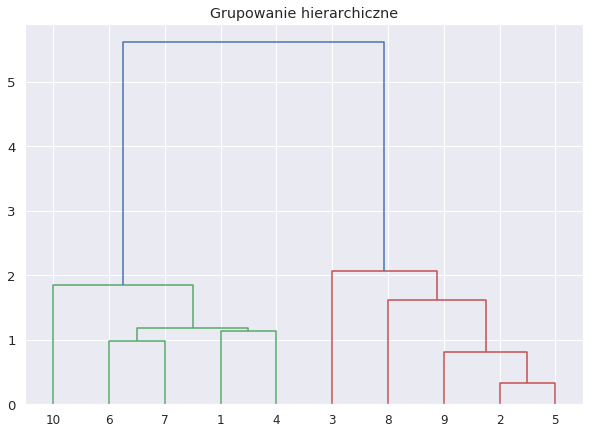

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=range(1, 11), distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne')
plt.show()

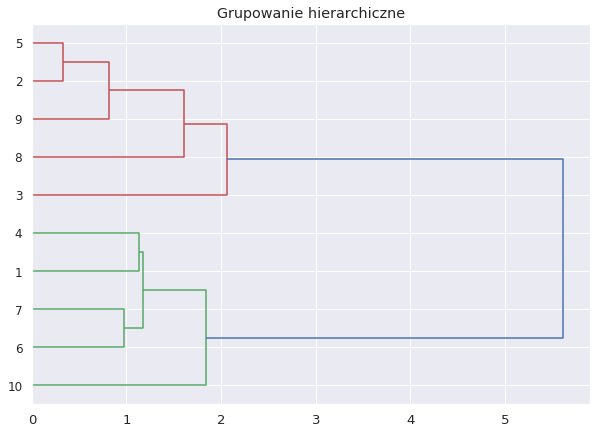

In [6]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='right', labels=range(1, 11), distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne')
plt.show()

### <a name='4'></a> Grupowanie hierarchiczne

In [7]:
# bottom-up approach
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [8]:
cluster.labels_

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [9]:
data

array([[ 1.98698524,  1.01624822],
       [-2.47077579,  6.74569915],
       [-0.42814528,  7.97886363],
       [ 2.69907195,  1.89278308],
       [-2.24151147,  6.97729195],
       [ 2.80387899,  0.16623205],
       [ 3.77943127,  0.15378756],
       [-1.76539583,  5.29814866],
       [-2.47683248,  7.75398895],
       [ 5.17755184,  1.35275945]])

In [10]:
df = pd.DataFrame(data, columns=['x1', 'x2'])
df['cluster'] = cluster.labels_
fig = px.scatter(df, 'x1', 'x2', 'cluster', width=700, height=500, title='Klasteryzacja', color_continuous_midpoint=0.6)
fig.update_traces(marker_size=12)
fig.show()